<a href="https://colab.research.google.com/github/c-mmonteiro/t1-algo-feature/blob/main/Trabaho1_MI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook do Trabalho de Feature Enginearing para a disciplina de Algoritmos Baseados em Dados para Problemas de Ciência e Engenharia.
Aluno: Carlos A M Monteiro

# 1. Conjunto de Dados

In [1]:
!git clone https://github.com/c-mmonteiro/t1-algo-feature.git

Cloning into 't1-algo-feature'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 28 (delta 7), reused 12 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (28/28), 3.25 MiB | 7.68 MiB/s, done.
Resolving deltas: 100% (7/7), done.


## 1.1 Importa os dados

In [2]:
import pandas as pd
import numpy as np

dados = pd.read_csv("/content/t1-algo-feature/TI_PETR4_2520_FROM_2018_09_28_TO_2023_09_28.csv")
#dados = pd.read_csv("TI_PETR4_2520_FROM_2018_09_28_TO_2023_09_28.csv")
dados

,SMA,WMA,Momentum,StochasticD,StochasticK,Williams,RSI,MACD,ADO,CCI,rendimento
0,9.412,9.344909,-0.74,21.076522,29.012346,70.987654,54.005401,0.179328,-1.117647,11.743451,-3.138075
1,9.340,9.320909,-0.39,19.671494,35.507246,64.492754,53.357558,0.153804,0.909091,34.092964,0.215983
2,9.272,9.257273,-0.33,19.375227,17.391304,82.608696,52.778561,0.125887,-0.448276,-36.242981,-3.125000
3,9.235,9.198727,-0.41,22.354123,18.181818,81.818182,52.455634,0.096954,0.657143,-26.258457,-0.444939
4,9.241,9.232364,0.10,29.193214,71.590909,28.409091,52.422907,0.075394,1.019231,70.175439,5.251397
...,...,...,...,...,...,...,...,...,...,...,...
1196,33.095,33.333636,1.93,89.052009,103.645833,-3.645833,53.927187,0.942278,1.077778,81.925622,2.543143
1197,33.290,33.478182,1.26,91.268977,94.607843,5.392157,53.953770,0.949702,0.315789,82.076325,0.059049
1198,33.440,33.630909,1.84,92.546958,107.262570,-7.262570,53.973585,0.957619,0.953488,88.053217,0.708174
1199,33.632,33.770909,0.84,92.499710,79.919679,20.080321,54.000478,0.964643,0.890909,84.366172,0.234398


## 1.2 Gráficos dos dados em relação ao Rendimento

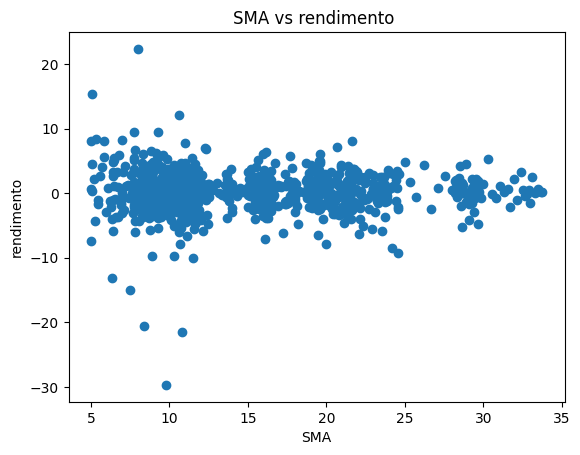

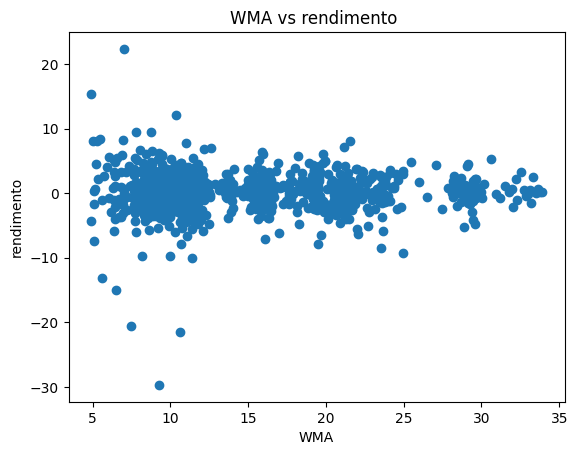

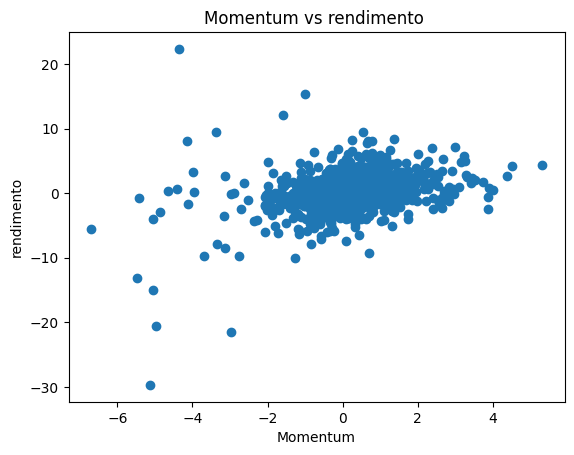

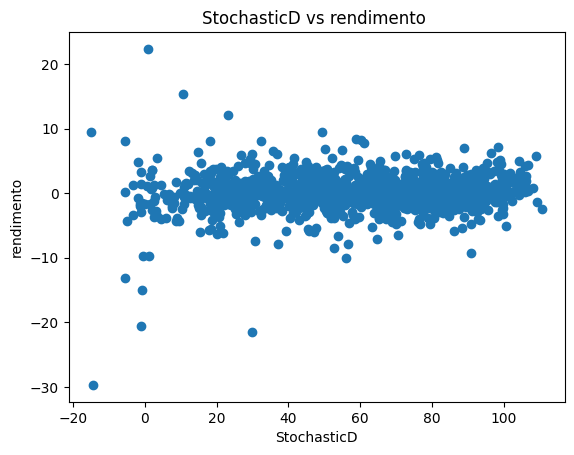

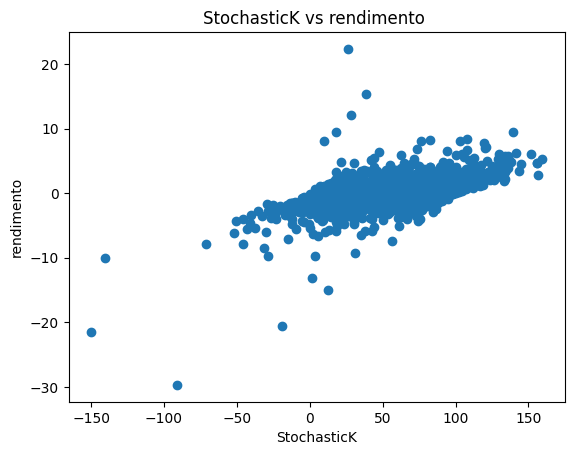

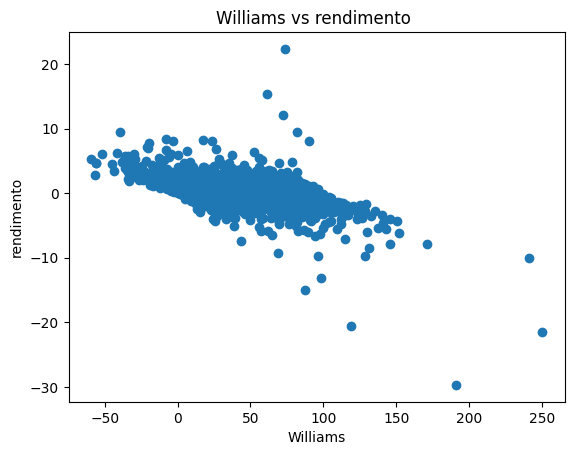

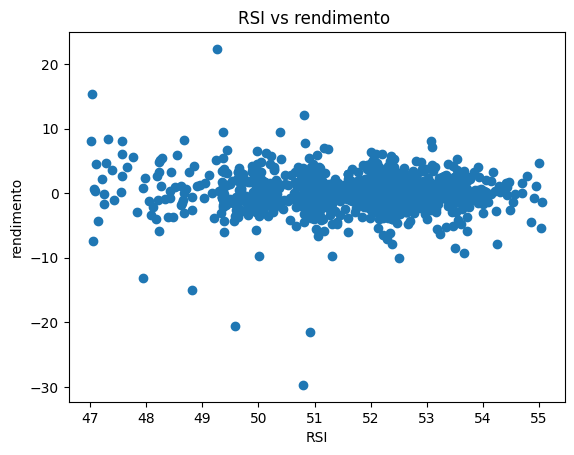

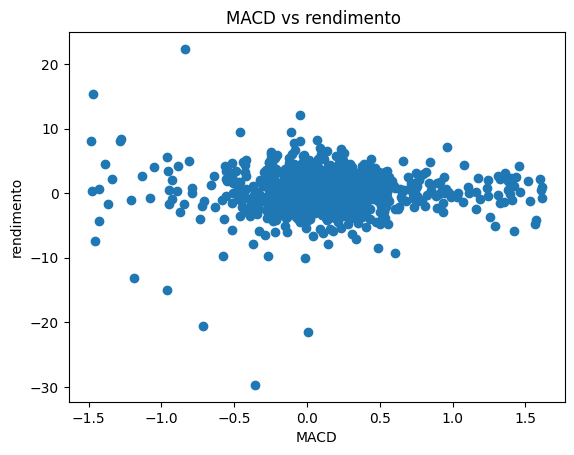

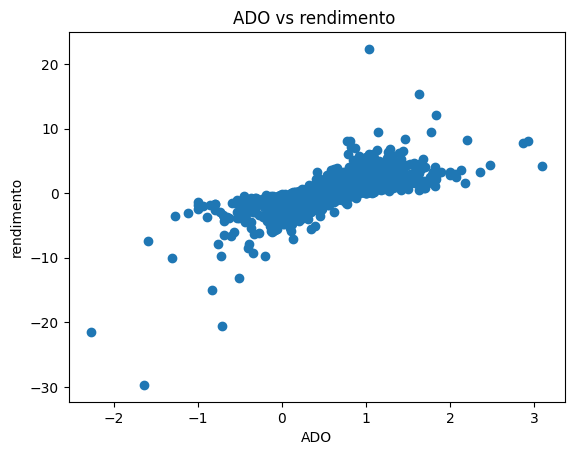

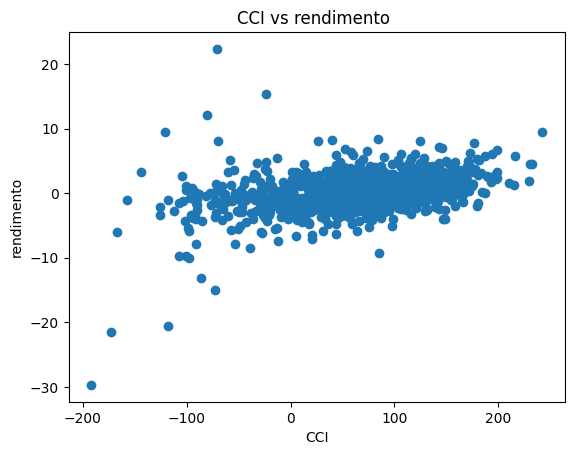

In [101]:
from matplotlib import pyplot as plt
colunas = dados.columns[:-1]
y_col = dados.columns[-1]

for idx, col in enumerate(colunas):
    plt.plot(dados[col], dados[y_col], 'o')
    plt.title(f'{col} vs {y_col} ')
    plt.xlabel(col)
    plt.ylabel(y_col)
    plt.show()

## 1.3 Histograma dos dados

In [4]:
def determina_bins(x, bins_rule = 'fd'):
    if bins_rule == 'classic':
        bins = int(len(x)**0.5)
    elif bins_rule == 'sturges':
        bins = int(np.ceil(np.log2(len(x)) + 1))
    elif bins_rule == 'scott': #ótima para distribuição normal
        bins = int((np.max(x) - np.min(x)) / (3.5 * np.std(x) * len(x)**(-1/3)))
    elif bins_rule == 'fd': #mais robusta para outliers
        bins = int((np.max(x) - np.min(x)) / (2 * (np.percentile(x, 75) - np.percentile(x, 25)) * len(x)**(-1/3)))

    return bins

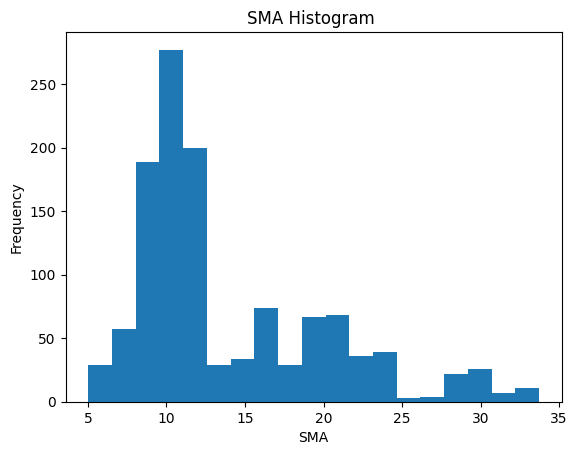

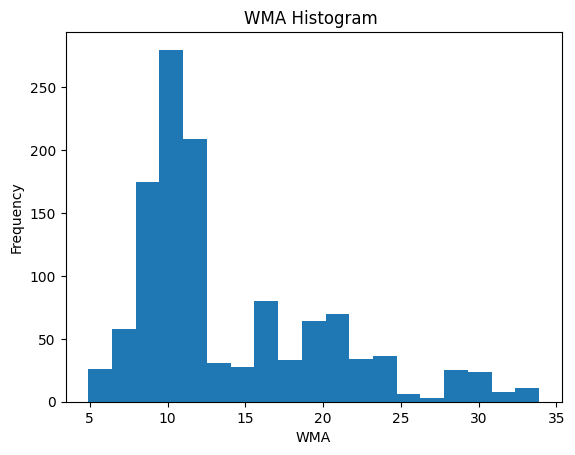

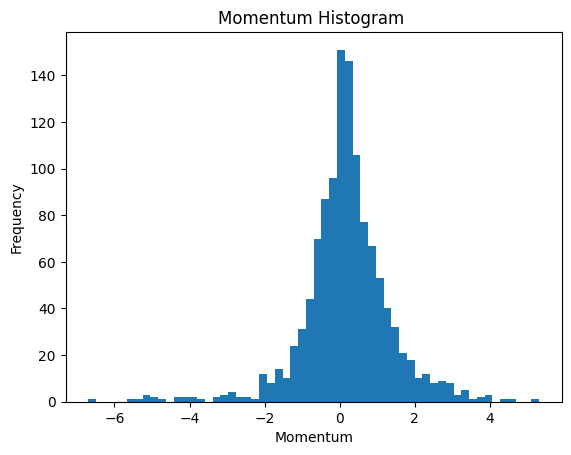

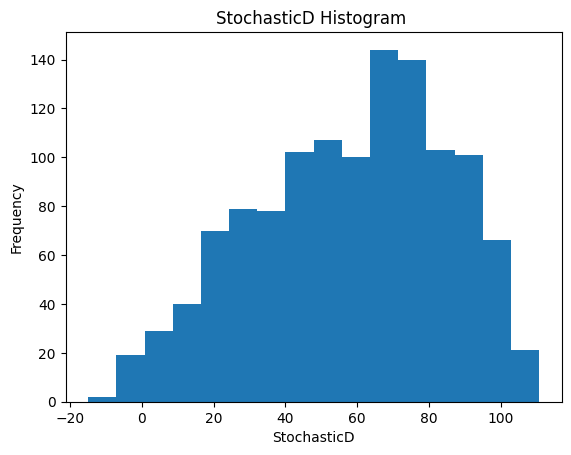

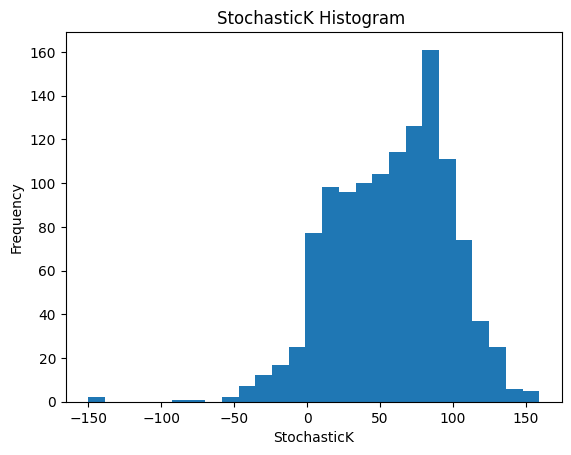

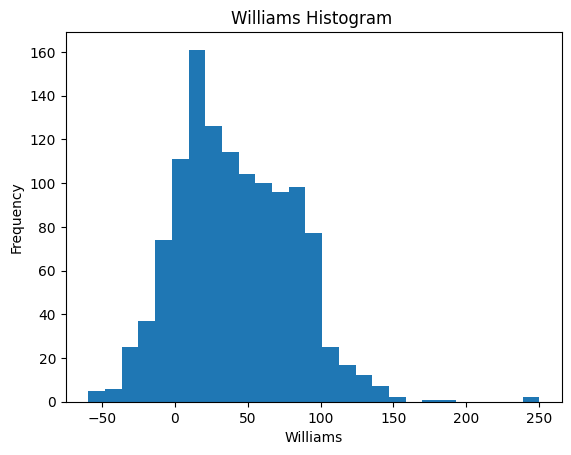

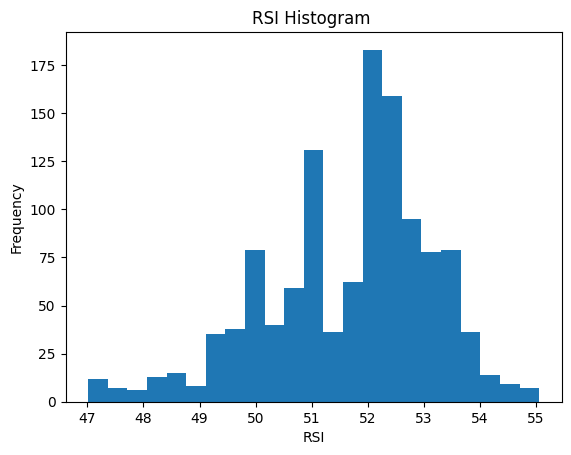

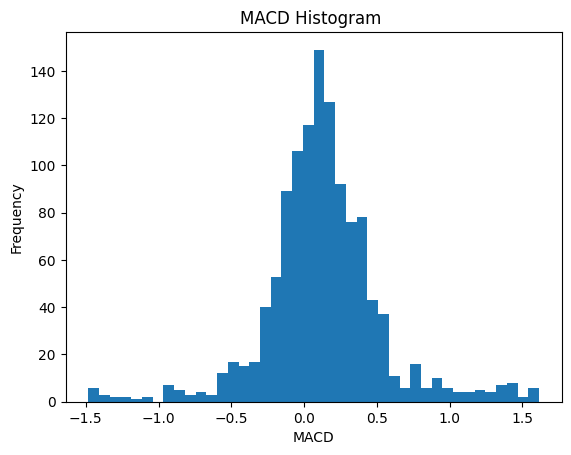

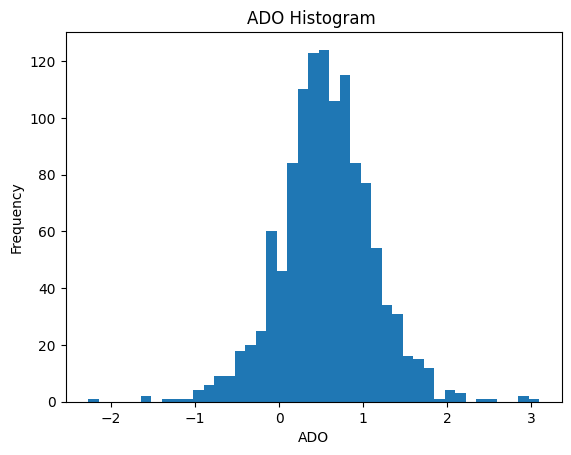

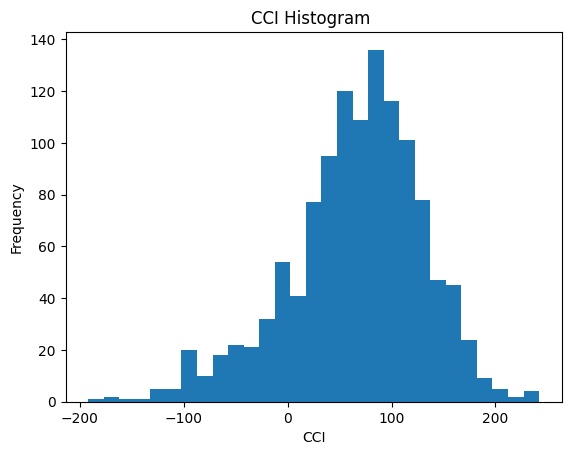

In [5]:
from matplotlib import pyplot as plt
colunas = dados.columns[:-1]

for idx, col in enumerate(colunas):
    plt.hist(dados[col], bins=determina_bins(dados[col]))
    plt.title(f'{col} Histogram ')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#  2. Modifiações nos dados

## 2.1 Converte os dados para distribuição

In [6]:
import numpy as np
import bisect

def converte_bins(x):
    '''
    Converte a coluna x em bins discretos.
    Parâmetros:
    x: array-like, coluna a ser convertida.
    bins: int, número de bins.
    Retorna:
    array-like, coluna
    '''
    edge = np.linspace(x.min(), x.max(), determina_bins(x)+1)

    x_bins = []
    for xi in x:
      x_bins.append(bisect.bisect_left(edge, xi))
    return x_bins

In [7]:
dados_bins = pd.DataFrame()
for col in colunas:
    dados_bins[col] = converte_bins(dados[col])
dados_bins

,SMA,WMA,Momentum,StochasticD,StochasticK,Williams,RSI,MACD,ADO,CCI
0,3,3,29,5,16,12,20,23,10,14
1,3,3,31,5,17,11,19,23,26,16
2,3,3,31,5,15,13,17,22,15,11
3,3,3,31,5,15,13,16,22,24,12
4,3,3,33,6,20,8,16,22,27,18
...,...,...,...,...,...,...,...,...,...,...
1196,19,19,42,14,23,5,20,33,27,19
1197,19,19,39,14,22,6,20,33,21,19
1198,19,19,42,14,23,5,20,34,26,19
1199,19,19,37,14,21,7,20,34,26,19


# 2.2 Transformações

In [10]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 12.3 MB/s eta 0:00:00


Aplica a transformação x' = (x**2)**alpha

O quadrado é aplicado para garantir com que não haja números negativos e portanto não ocorra de o resultado da transformação seja complexo.

In [17]:
from scipy.stats import shapiro
import optuna as opt

opt.logging.set_verbosity(opt.logging.CRITICAL)

def objective(trial, col_idx):
    col = dados.columns[col_idx]
    alpha = trial.suggest_float('alpha', -1.0, 1.0)
    coluna_modificada = dados[col]**2 #eleva ao quadro para evitar valores negativos
    try:
        dados_transf = coluna_modificada**alpha
        if np.any(np.isnan(dados_transf)) or np.any(np.isinf(dados_transf)):
            return -np.inf  # penaliza soluções inválidas
        stat, p = shapiro(dados_transf)
        return stat
    except Exception:
        return -np.inf

print(f'    Coluna    | Alfa')
print('--------------|-------------')
parametro_alpha_transformacao = []
for idx in range(len(dados.columns)-1):
    study = opt.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, idx), n_trials=100, show_progress_bar=False)
    print(f'{dados.columns[idx].ljust(13)} | {study.best_params["alpha"]:.3f}')
    parametro_alpha_transformacao.append(np.float64(study.best_params["alpha"]))

    Coluna    | Alfa
--------------|-------------
SMA           | -0.315
WMA           | -0.311
Momentum      | 0.134
StochasticD   | 0.582
StochasticK   | 0.414
Williams      | 0.221
RSI           | 1.000
MACD          | 0.104
ADO           | 0.263
CCI           | 0.357


In [22]:
dados_transformados = pd.DataFrame()
for idx, col in enumerate(colunas):
    dados_transformados[col] = np.power(dados[col]**2, parametro_alpha_transformacao[idx])

In [23]:
dados_transformados.isna().sum()

,0
SMA,0
WMA,0
Momentum,0
StochasticD,0
StochasticK,0
Williams,0
RSI,0
MACD,0
ADO,0
CCI,0


Mostrar os histogramas originais e dos dados transformados

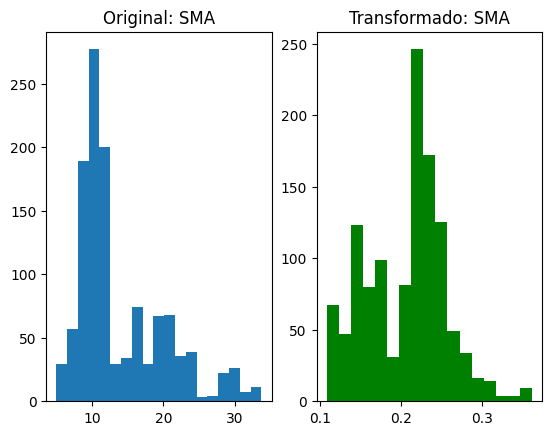

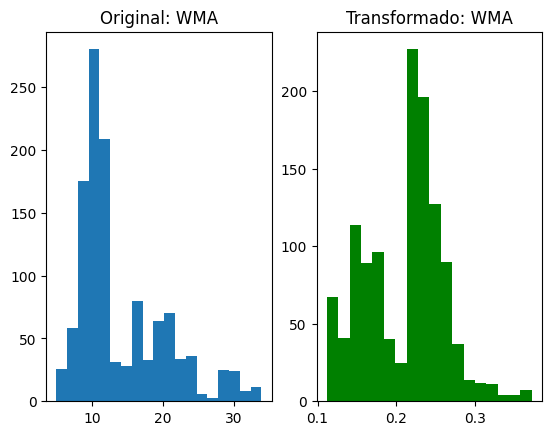

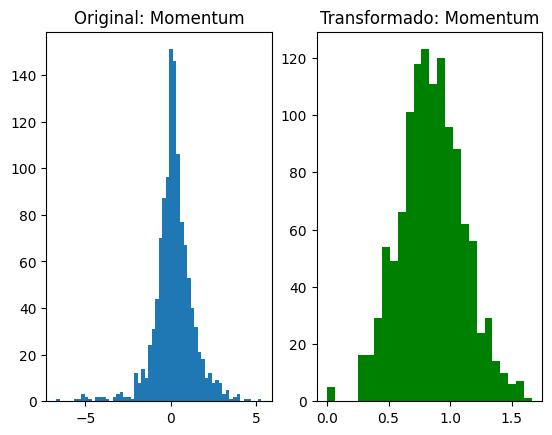

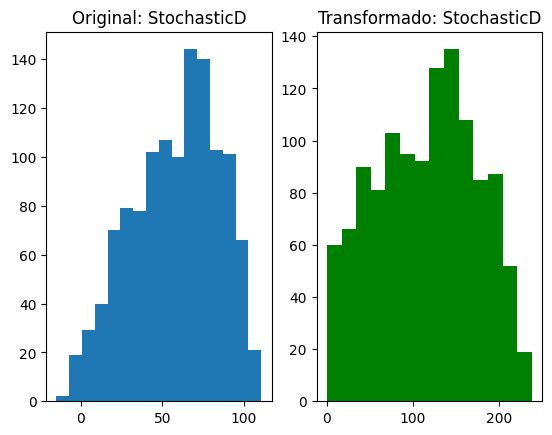

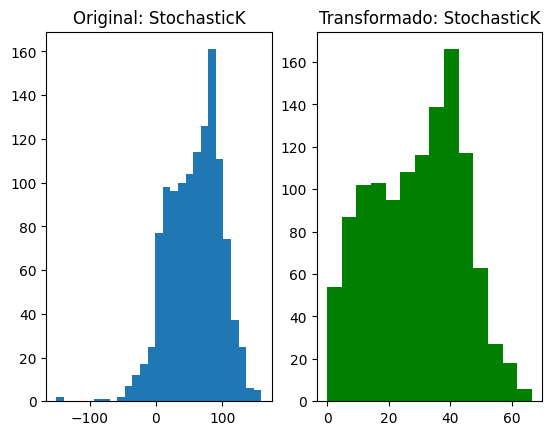

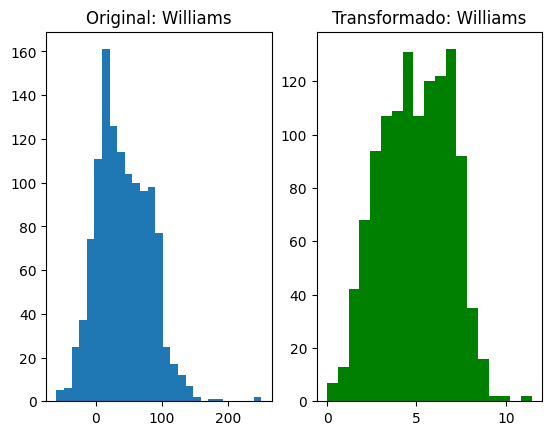

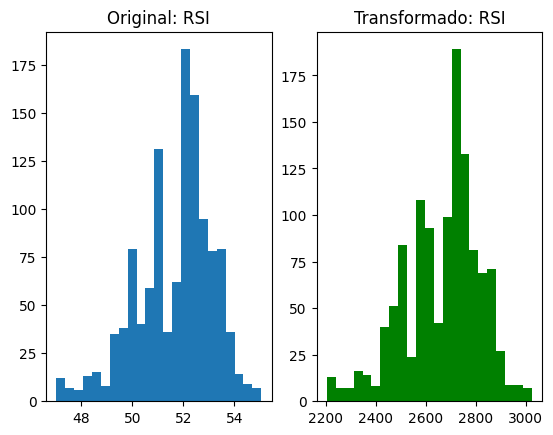

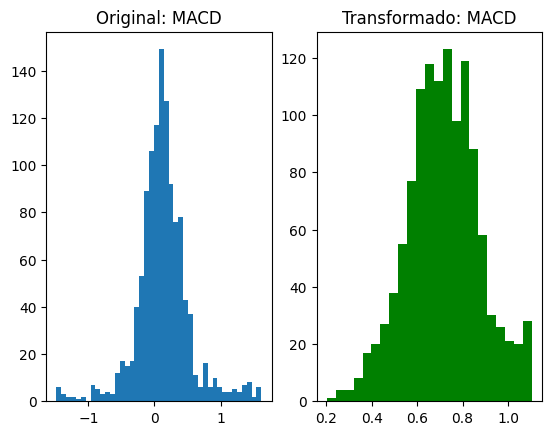

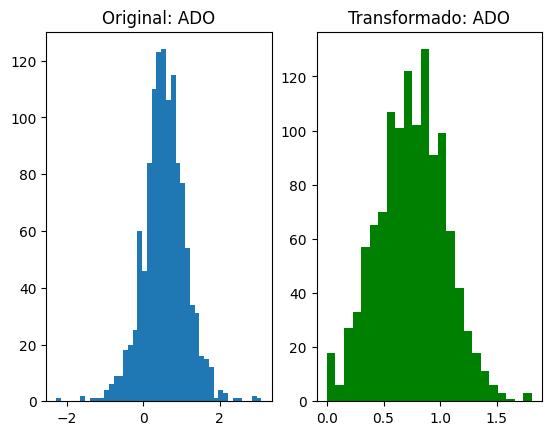

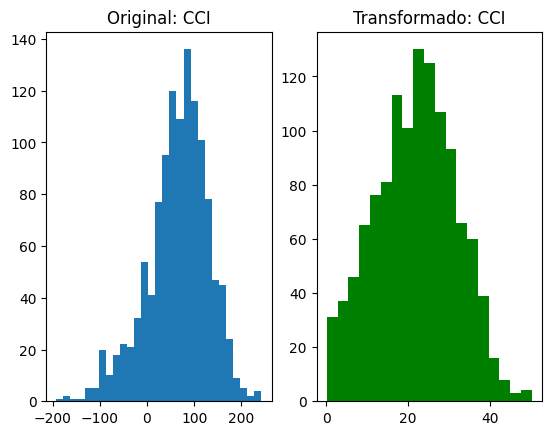

In [26]:
# Exemplo: mostrar histogramas antes e depois da transformação para cada coluna
import matplotlib.pyplot as plt

for idx in range(len(dados.columns)-1):
    col = dados.columns[idx]

    plt.subplot(1, 2, 1)
    plt.hist(dados[col], bins=determina_bins(dados[col]))
    plt.title(f'Original: {col}')
    plt.subplot(1, 2, 2)
    plt.hist(dados_transformados[col], bins=determina_bins(dados_transformados[col]), color= 'g')
    plt.title(f'Transformado: {col}')
    plt.show()

# 3. Cálculo das correlações entre os dados de entrada e a saída



## 3.1 Cálculo da *Mutual Information*

Calculo da *Mutual Information* por meio do hitograma. A forma de definir o número de bins pode ser escolhido entre os métodos Classico, Struges, Scoot e Freedman-Diaconis.

In [27]:
def calc_mi(x, y, bins_rule='classic'):
    '''Calcula a Mutual Information entre duas variáveis x e y usando histogramas.
    Parâmetros:
    x: array-like, primeira variável.
    y: array-like, segunda variável.
    bins_rule: str, regra para determinar o número de bins. Opções: 'classic', 'sturges', 'scott', 'fd'.
    Retorna:
    mi: float, valor da Mutual Information.
    '''

    bins_x = determina_bins(x, bins_rule)
    bins_y = determina_bins(y, bins_rule)

    hist2d, x_edges, y_edges = np.histogram2d(x, y, bins=[bins_x, bins_y])

    hist2d_norm = hist2d / np.sum(hist2d)

    hist_x = np.sum(hist2d_norm, axis=1)
    hist_y = np.sum(hist2d_norm, axis=0)

    entropia_x = -sum(hist_x[hist_x > 0] * np.log(hist_x[hist_x > 0]))
    entropia_y = -sum(hist_y[hist_y > 0] * np.log(hist_y[hist_y > 0]))

    entropia_conjunta = -sum(hist2d_norm[hist2d_norm > 0] * np.log(hist2d_norm[hist2d_norm > 0]))

    mi = entropia_x + entropia_y - entropia_conjunta

    return mi

**Dúvida:** Na minha cabeça faz mais sentido colocar os os métodos de determinação da bin como entrada, pode ser assim?

Testes da Mutual Information

In [102]:
bins_rule = ['classic', 'sturges', 'scott', 'fd']

print(f'  Teste do Mutual Information com os dados originais\n')
print(f'    Dado     | {bins_rule[0]} | {bins_rule[1]} |  {bins_rule[2]}  |  {bins_rule[3]}')
print('-------------|---------|---------|---------|--------')
for idx, col in enumerate(colunas):
    bins_list = []
    for br in bins_rule:
        bins_list.append(calc_mi(dados[col], dados[y_col], bins_rule=br))
    print(f'{col.ljust(13)}|  {bins_list[0]:.3f}  |  {bins_list[1]:.3f}  |  {bins_list[2]:.3f}  |  {bins_list[3]:.3f}')


  Teste do Mutual Information com os dados originais

    Dado     | classic | sturges |  scott  |  fd
-------------|---------|---------|---------|--------
SMA          |  0.167  |  0.042  |  0.125  |  0.231
WMA          |  0.172  |  0.044  |  0.128  |  0.240
Momentum     |  0.183  |  0.086  |  0.223  |  0.441
StochasticD  |  0.197  |  0.049  |  0.140  |  0.240
StochasticK  |  0.368  |  0.208  |  0.388  |  0.475
Williams     |  0.368  |  0.208  |  0.388  |  0.475
RSI          |  0.193  |  0.050  |  0.146  |  0.299
MACD         |  0.173  |  0.052  |  0.157  |  0.377
ADO          |  0.610  |  0.400  |  0.670  |  0.796
CCI          |  0.236  |  0.118  |  0.248  |  0.374


Mutual Information, usando Freedman–Diaconis, aplicada aos dados originais, aos dados em bins e aos dados transformados.

In [103]:
print(f'     Dado     | Original | Transformado |    Bins')
print(f'--------------|----------|--------------|--------------')
for idx, col in enumerate(colunas):
    mi_dados = calc_mi(dados[col], dados[y_col], bins_rule='fd')
    mi_transform = calc_mi(dados_transformados[col], dados[y_col], bins_rule='fd')
    mi_bins = calc_mi(dados_bins[col], dados[y_col], bins_rule='fd')

    print(f'{col.ljust(14)}|   {mi_dados:.3f}  |     {mi_transform:.3f}    |   {mi_bins:.3f}  ')

     Dado     | Original | Transformado |    Bins
--------------|----------|--------------|--------------
SMA           |   0.231  |     0.225    |   0.234  
WMA           |   0.240  |     0.243    |   0.243  
Momentum      |   0.441  |     0.271    |   0.441  
StochasticD   |   0.240  |     0.212    |   0.241  
StochasticK   |   0.475  |     0.388    |   0.476  
Williams      |   0.475  |     0.370    |   0.477  
RSI           |   0.299  |     0.298    |   0.270  
MACD          |   0.377  |     0.270    |   0.379  
ADO           |   0.796  |     0.655    |   0.796  
CCI           |   0.374  |     0.284    |   0.343  


Os 4 dados de maior correlação com a saída, considerando o Mutual Information, são destacados na tabela abaixo. Observa-se que <u>a transformação **reduziou** o correlação dos dados com a saída</u>, inclusive fazendo com que o RSI seja mais correlato do que o Mementum.

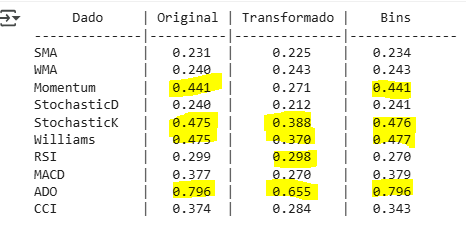

## 3.2 Hilbert-Schmidt Independence Criterion (HSIC)

In [59]:
from sklearn.metrics.pairwise import rbf_kernel

def calc_hsic(x, y, sigma_x = None, sigma_y = None):

    x = np.asarray(x)
    y = np.asarray(y)

    len_x = len(x)

    H = np.eye(len_x) - np.ones((len_x, len_x))/len_x

    if sigma_x is None:
        sigma_x = np.median(np.abs(x[:, None] - x[None, :]))

    if sigma_y is None:
        sigma_y = np.median(np.abs(y[:, None] - y[None, :]))

    K = rbf_kernel(x.reshape(-1, 1), gamma=1/(2*sigma_x**2))
    L = rbf_kernel(y.reshape(-1, 1), gamma=1/(2*sigma_y**2))

    return np.trace(H @ K @ H @ L) / (len_x - 1)**2

**Dúvida:** Na minha cabeça faz mais sentido calcular o sigma para os dados inseridos, pode ser assim?

HSIC aplicada aos dados originais, aos dados em bins e aos dados transformados.

In [104]:
colunas = dados.columns[:-1]

print(f'     Dado     | Original | Transformado |    Bins')
print(f'--------------|----------|--------------|--------------')
for idx, col in enumerate(colunas):
  hsic_dados = calc_hsic(dados[col], dados[y_col])
  hsic_transform = calc_hsic(dados_transformados[col], dados[y_col])
  hsic_bins = calc_hsic(dados_bins[col], dados[y_col])

  print(f'{col.ljust(14)}|  {hsic_dados:.5f} |    {hsic_transform:.5f}   |   {hsic_bins:.5f}  ')

     Dado     | Original | Transformado |    Bins
--------------|----------|--------------|--------------
SMA           |  0.00047 |    0.00059   |   0.00052  
WMA           |  0.00049 |    0.00064   |   0.00049  
Momentum      |  0.00304 |    0.00080   |   0.00300  
StochasticD   |  0.00064 |    0.00065   |   0.00064  
StochasticK   |  0.01237 |    0.01214   |   0.01226  
Williams      |  0.01237 |    0.00996   |   0.01224  
RSI           |  0.00076 |    0.00077   |   0.00076  
MACD          |  0.00068 |    0.00031   |   0.00067  
ADO           |  0.03474 |    0.03212   |   0.03440  
CCI           |  0.00631 |    0.00488   |   0.00632  


Os 4 dados de maior correlação com a saída, considerando o HSIC, são destacados na tabela abaixo. Observa-se que para este método, a transformação **não** altereou de forma significativa como no MI, contudo não temos mais o Momentum, nem o RSI dentro dos top 4, sendo agora o CCI.

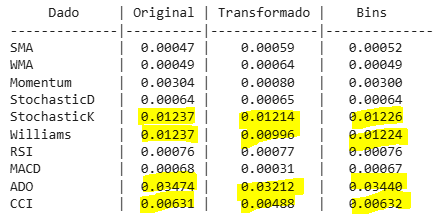

## Considerações

Considerando os resultados apresentados pela avaliação de correlação do Mutual Information e do HSIC concluimos que as entradas **StochasticK, Williams e ADO** são as que tem maior correlação por ambos os métodos.

In [106]:
col_top = ["StochasticK", "Williams", "ADO"]

# 4. Avaliação com xgBoost + SHAP

## 4.1. Teste Inicial

Testa os dados originais, separados por bins e transformados com todos os atributos. Em seguida testa os mesmos, mas apenas com os melhores atributos definidos na list *col_top*.

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
import xgboost

def evaluate_model_xgBoost(X, y, id):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = XGBRegressor()
  model.fit(X_train, y_train)

  y_pred_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)

  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  print(f'{id.ljust(10)}|  {mse_train:.4f}  |  {mse:.2f}')

In [110]:
print(f'  Dado    |  Train   |  Test ')
print(f'----------|----------|-------')
evaluate_model_xgBoost(dados[dados.columns[:-1]], dados[y_col], 'Dados')
evaluate_model_xgBoost(dados_bins[dados_bins.columns[:-1]], dados[y_col], 'Bins')
evaluate_model_xgBoost(dados_transformados[dados_transformados.columns[:-1]], dados[y_col], 'Transform')
print(f'TOP Atribu|----------|-------')
evaluate_model_xgBoost(dados[col_top], dados[y_col], 'Dados')
evaluate_model_xgBoost(dados_bins[col_top], dados[y_col], 'Bins')
evaluate_model_xgBoost(dados_transformados[col_top], dados[y_col], 'Transform')


  Dado    |  Train   |  Test 
----------|----------|-------
Dados     |  0.0048  |  2.54
Bins      |  0.0789  |  2.87
Transform |  0.0107  |  4.82
TOP Atribu|----------|-------
Dados     |  0.1679  |  4.34
Bins      |  1.7584  |  4.66
Transform |  0.1908  |  5.92


## 4.2. Avaliação dos Atibutos Originais

### 4.2.1. Com *plot_importance*

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

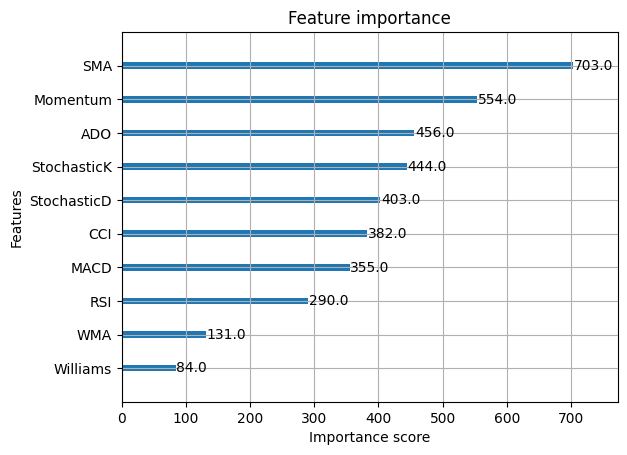

In [111]:
X_train, X_test, y_train, y_test = train_test_split(dados[dados.columns[:-1]], dados[y_col], test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

xgboost.plot_importance(model)

### 4.2.2. Com SHAP

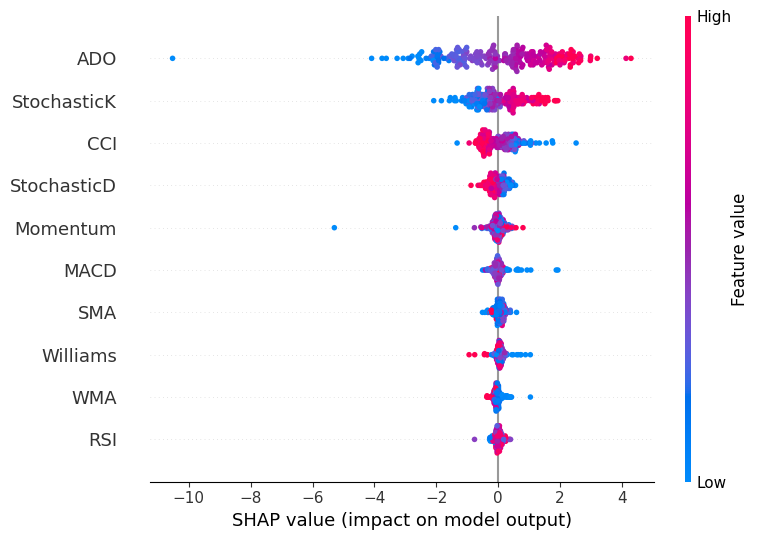

In [112]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### 4.2.3. Teste Modelo


In [113]:
dados.columns

Index(['SMA', 'WMA', 'Momentum', 'StochasticD', 'StochasticK', 'Williams',
       'RSI', 'MACD', 'ADO', 'CCI', 'rendimento'],
      dtype='object')

In [115]:
col_feature = ['SMA', 'Momentum', 'ADO']
col_shap = ['ADO', 'StochasticK', 'CCI']

print(f'  Dado    |  Train   |  Test ')
print(f'----------|----------|-------')
evaluate_model_xgBoost(dados[dados.columns[:-1]], dados[y_col], 'Dados')
evaluate_model_xgBoost(dados[col_feature], dados[y_col], 'Feature')
evaluate_model_xgBoost(dados[col_shap], dados[y_col], 'SHAP')

  Dado    |  Train   |  Test 
----------|----------|-------
Dados     |  0.0048  |  2.54
Feature   |  0.0708  |  3.37
SHAP      |  0.0448  |  3.06


## 4.3. Avaliação dos Atributos em Bins

### 4.3.1. Com *plot_importance*

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

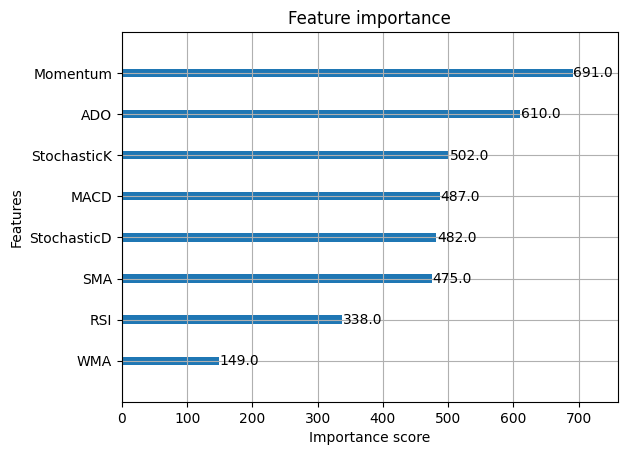

In [116]:
X_train, X_test, y_train, y_test = train_test_split(dados_bins[dados_bins.columns[:-1]], dados[y_col], test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

xgboost.plot_importance(model)

### 4.3.2. Com SHAP

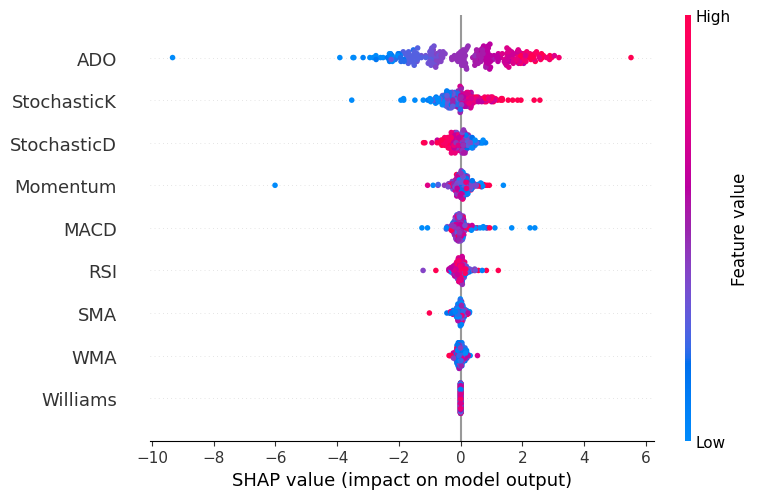

In [117]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### 4.3.3. Teste Modelo

In [119]:
col_feature = ['StochasticK', 'Momentum', 'ADO']
col_shap = ['ADO', 'StochasticK', 'StochasticD']

print(f'  Dado    |  Train   |  Test ')
print(f'----------|----------|-------')
evaluate_model_xgBoost(dados_bins[dados_bins.columns[:-1]], dados[y_col], 'Dados')
evaluate_model_xgBoost(dados_bins[col_feature], dados[y_col], 'Feature')
evaluate_model_xgBoost(dados_bins[col_shap], dados[y_col], 'SHAP')

  Dado    |  Train   |  Test 
----------|----------|-------
Dados     |  0.0789  |  2.87
Feature   |  0.4571  |  3.23
SHAP      |  0.4888  |  4.71


## 4.4. Avaliação dos Atributos Transformados

### 4.4.1. Com *plot_importance*

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

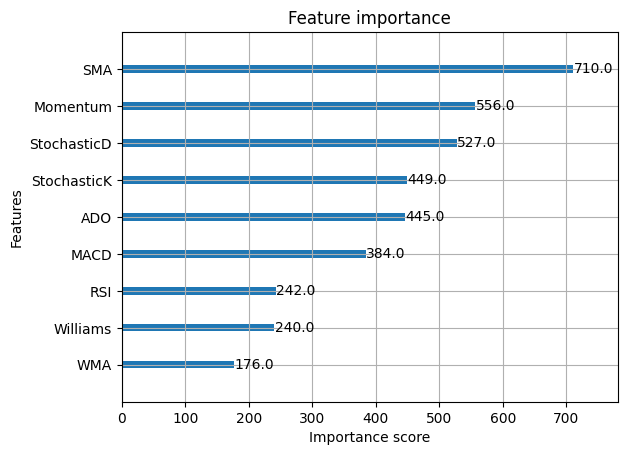

In [120]:
X_train, X_test, y_train, y_test = train_test_split(dados_transformados[dados_transformados.columns[:-1]], dados[y_col], test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

xgboost.plot_importance(model)

### 4.4.2. Com SHAP

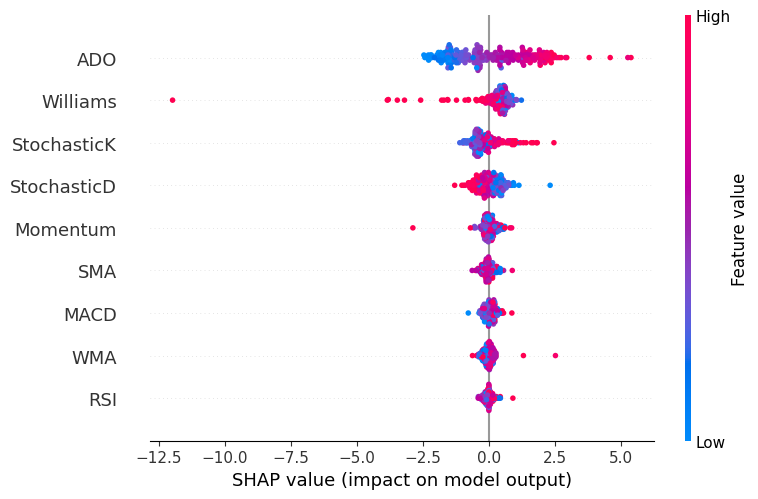

In [121]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### 4.4.3. Teste Modelo



In [123]:
col_feature = ['StochasticD', 'Momentum', 'SMA']
col_shap = ['ADO', 'StochasticK', 'Williams']

print(f'  Dado    |  Train   |  Test ')
print(f'----------|----------|-------')
evaluate_model_xgBoost(dados_transformados[dados_transformados.columns[:-1]], dados[y_col], 'Dados')
evaluate_model_xgBoost(dados_transformados[col_feature], dados[y_col], 'Feature')
evaluate_model_xgBoost(dados_transformados[col_shap], dados[y_col], 'SHAP')

  Dado    |  Train   |  Test 
----------|----------|-------
Dados     |  0.0107  |  4.82
Feature   |  0.1966  |  10.20
SHAP      |  0.1908  |  5.05
